In [1]:
import numpy.linalg as la
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

## Problem 1.

In [2]:
def jacobi_method(A, b, tol, maxiters):
    D = np.diag(A)
    U = np.triu(A)
    np.fill_diagonal(U, 0)
    L = np.tril(A)
    np.fill_diagonal(L, 0)
    
    iters = 0
    x = np.zeros(A.shape[0])
    while iters < maxiters:
        x_n = x + ((b - np.dot(A, x)) / D)
        if max(abs(x_n - x)) < tol:
            break
        x = x_n
    return x

In [3]:
def diag_dom(n, num_entries=None):
    
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [4]:
n = 10
b = np.random.random(n)
A = diag_dom(n)
x = jacobi_method(A, b, 1e-5, 1e5)

print(np.allclose(A@x, b, 1e-3))

True


## Probem 2.

In [5]:
def jacobi_method_plt(A, b, tol, maxiters, plot=False):
    D = np.diag(A)
    U = np.triu(A)
    np.fill_diagonal(U, 0)
    L = np.tril(A)
    np.fill_diagonal(L, 0)
    
    if plot:
        errs = np.zeros(int(maxiters))
    
    iters = 0
    x = np.zeros(A.shape[0])
    while iters < maxiters:
        x_n = x + ((b - np.dot(A, x)) / D)
        err = max(abs(x_n - x))
        if plot:
            errs[iters] = err
        if err < tol:
            break
        x = x_n
        iters += 1
        
    if plot:
        xvals = np.arange(0, iters)
        plt.semilogy(xvals, errs[:iters])
        plt.title("Convergence of Jacobi Method")
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.show()
        
    return x

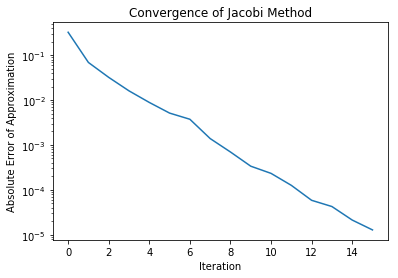

In [6]:
n = 20
b = np.random.random(n)
A = diag_dom(n)
x = jacobi_method_plt(A, b, 1e-5, 1e6, True)

## Problem 3.

In [7]:
def gauss_seidel_method(A, b, tol, maxiters, plot=False):
    D = np.diag(A)
    x = np.zeros(A.shape[0])
    
    if plot:
        errs = np.zeros(maxiters)
    
    iters = 0
    while iters < maxiters:
        x0 = np.copy(x)
        for i in range(A.shape[0]):
            x0 = np.copy(x)
            Aix = A[i,:].T @ x0
            x[i] = x0[i] + ((b[i] - Aix) / D[i])
        err = np.amax(np.absolute(x - x0))

        if plot:
            errs[iters] = err
        if err < tol:
            break
        iters += 1
    
    if plot:
        xvals = np.arange(0, iters)
        plt.semilogy(xvals, errs[:iters])
        plt.title("Convergence of Gauss Seidel Method")
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.show() 


    return x

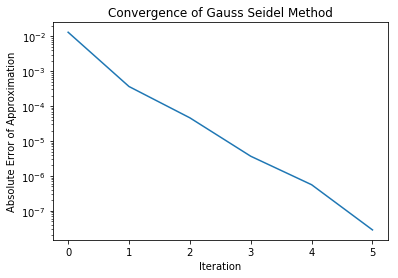

[ 0.77555149  0.73606017  0.49254662 ...,  0.21096564  0.83300668
  0.68558774]
[ 0.7755518   0.73606048  0.49254668 ...,  0.21096564  0.83300668
  0.68558774]


In [8]:
n = 2000
b = np.random.random(n)
A = diag_dom(n)
x = gauss_seidel_method(A, b, 1e-8, 1000, True)

print(A @ x)
print(b)

## Problem 4.

In [10]:
def gauss_seidel_sparse(A, b, tol, maxiters):
    D = sparse.csr_matrix.diagonal(A)
    x = np.zeros(A.shape[0])
    
    iters = 0
    while iters < maxiters:
        x0 = np.copy(x)
        for i in range(A.shape[0]):
            x0 = np.copy(x)
            rowstart = A.indptr[i]
            rowend = A.indptr[i + 1]
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x[i] = x0[i] + ((b[i] - Aix) / D[i])
        err = np.amax(np.absolute(x - x0))
        if err < tol:
            break
    
    return x

In [11]:

n = 10
b = np.random.random(n)
A = sparse.csr_matrix(diag_dom(n))
x = gauss_seidel_sparse(A, b, 1e-6, 1000)

print(A @ x)
print(b)

[ 0.45469594  0.91496774  0.82619454  0.3808535   0.05219173  0.80734627
  0.00338335  0.08471784  0.90396369  0.06975908]
[ 0.45469594  0.91496774  0.82130415  0.66590418  0.05463692  0.80734627
  0.00338335  0.08471784  0.90396369  0.06975908]


 ## Problem 5.

In [12]:
def sor_method(A, b, omega, tol, maxiters):
    D = sparse.csr_matrix.diagonal(A)
    x = np.zeros(A.shape[0])
    
    iters = 0
    while iters < maxiters:
        x0 = np.copy(x)
        for i in range(A.shape[0]):
            x0 = np.copy(x)
            rowstart = A.indptr[i]
            rowend = A.indptr[i + 1]
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x[i] = x0[i] + (omega * (b[i] - Aix) / D[i])
        err = np.amax(np.absolute(x - x0))
        if err < tol:
            break
        iters += 1
    
    return x, iters

## Problem 6.

In [13]:
import numpy as np

def problem6(n, omega, tol = 1e-8, maxiters = 100, plot = False):
    B = sparse.diags(np.ones(n)*-4) + sparse.diags(np.ones(n-1), -1) + sparse.diags(np.ones(n-1), 1)
    diags = []
    for i in range(n):
        diags.append(B)
    A = sparse.block_diag(diags)
    A = A + sparse.diags(np.ones(n**2 - n), n) + sparse.diags(np.ones(n**2 - n), -(n))
    b = np.zeros(n)
    b[0] = -100
    b[n-1] = -100
    b = np.tile(b, n)
    u = sor_method(A, b, omega, tol, maxiters) 
    
    if plot == False:
        return u, u[1] 
    
    if plot == True:
        umat = np.reshape(u[0],(n,n))
        X = np.arange(1, n+1, 1) 
        Y = np.arange(1, n+1, 1)
        xx, yy = np.meshgrid(X,Y)
        plt.pcolormesh(xx, yy, umat, cmap = "coolwarm") #if this doesn't work, change xx and yy to X and Y
        plt.title("Heatmap of Plate's Temperature in Steady State")
        plt.colorbar()
        plt.show()
        return u, u[1]

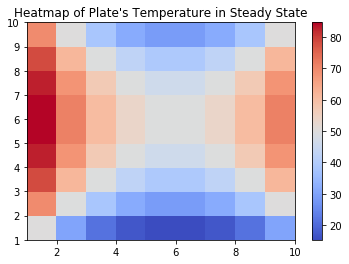

In [15]:
n = 10
omega = 1
u, u1 = problem6(n, omega, plot=True)

## Problem 7.

In [16]:
def problem7():
    omegavec = np.arange(1, 2, 0.05)
    n = 20
    itervec = np.zeros((len(omegavec),1))
    for i in range(len(omegavec)):
        itervec[i] = problem6(n, omegavec[i], tol = 1e-2, maxiters = 1000, plot = False)[1]
    plt.plot(omegavec, itervec)
    plt.xlabel("Omega")
    plt.ylabel("Number of Iterations")
    plt.title("Number of Iterations as a Function of Omega")
    plt.show()
    
    minindex = np.argmin(itervec)
    return omegavec[minindex]

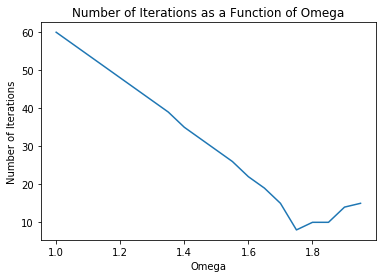

Minimizing index: 1.75


In [17]:
minindex = problem7()
print("Minimizing index:", minindex)